## Fraud Detection
Fraud detection refers to the process of monitoring transactions and customer behavior to pinpoint and fight fraudulent activity. It is estimated that the typical organization loses 5% of its annual revenue to fraud each year. Fraud detection is a task inherently suitable for machine learning, as machine learn‐ ing–based models can scan through huge transactional datasets, detect unusual activ‐ ity, and identify all cases that might be prone to fraud. By collecting data from various sources and then mapping them to trigger points, machine learn‐ ing solutions are able to discover the rate of defaulting or fraud propensity for each potential customer and transaction, providing key alerts and insights for the financial institutions.

In the classification framework defined for this case study, the target variable has the column name “Class.” This column has a value of 1 in the case of fraud and a value of 0 otherwise. The [dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) holds transactions by European cardholders that occurred over two days in September 2013, with 492 cases of fraud out of 284,807 transactions.


In [4]:
import pandas as pd
# load dataset
dataset = pd.read_csv('./data/creditcard.csv')
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
### Explorative Data Analysis

In [5]:
# shape
dataset.shape

(284807, 31)

In [7]:
# peek at data
pd.set_option('display.width', 100)
dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# types
pd.set_option('display.max_rows', 500)
dataset.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

The entire data type is float, except Class which is integer, and the variable names aren't intuitive. Indeed variables names (V1, V2, etc.) are nondescript, this is due to privacy reasons.

We can check the number of fraud vs non-fraud cases in the dataset. We can see that the dataset is clearly **unbalanced** with most of the transactions being non-fraud.

Class
Not Fraud    284315
Fraud           492
Name: count, dtype: int64


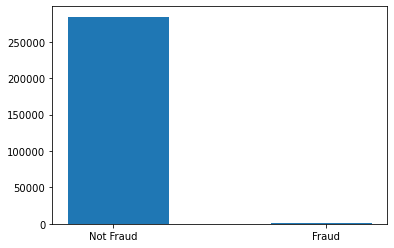

In [29]:
import matplotlib.pyplot as plt
import numpy as np
class_names = {0:'Not Fraud', 1:'Fraud'}
dataset['Class'].hist(grid=False, bins=3)
plt.xticks(ticks=[0.15,0.85], labels=['Not Fraud', 'Fraud'])
print(dataset.Class.value_counts().rename(index = class_names))

In [30]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = False


### Feature selection
Although some of the features are relevant, feature selection is not given significant preference

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(k=10)
Y = dataset["Class"]
X = dataset.loc[:, dataset.columns != 'Class']
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

   Specs         Score
17   V17  33979.168593
14   V14  28695.547788
12   V12  20749.822361
10   V10  14057.979985
16   V16  11443.349428
3     V3  11014.508305
7     V7  10349.605408
11   V11   6999.355047
4     V4   5163.832114
18   V18   3584.380605


### Evaluate algorithms and models

In [58]:
from sklearn.model_selection import train_test_split
# Train-test split
Y= dataset["Class"]
X = dataset.loc[:, dataset.columns != 'Class']
validation_size = 0.2
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, shuffle=True)
scoring = 'accuracy'

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Given Data is huge, some of the slower classification algorithms are commented
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# #Neural Network
# models.append(('NN', MLPClassifier()))
# # #Ensable Models 
# # Boosting methods
# models.append(('AB', AdaBoostClassifier()))
# models.append(('GBM', GradientBoostingClassifier()))
# # Bagging methods
# models.append(('RF', RandomForestClassifier()))
# models.append(('ET', ExtraTreesClassifier()))

In [60]:
from sklearn.model_selection import KFold, cross_val_score
# k-fold
num_folds = 10

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.998960 (0.000207)
LDA: 0.999381 (0.000101)
KNN: nan (nan)
CART: 0.999113 (0.000205)


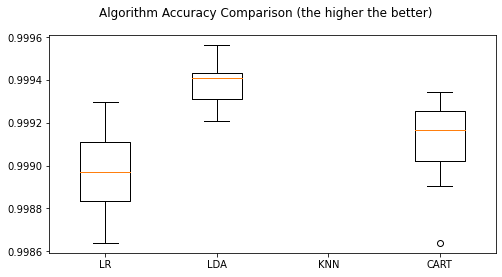

In [61]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Accuracy Comparison (the higher the better)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
plt.show()

The accuracy of the overall result is quite high. But we pick CART model and we check how well it predicts the fraud cases:

In [62]:
# prepare model
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# estimate accuracy on validation set
#rescaledValidationX = scaler.transform(X_validation)
#rescaledValidationX = X_validation
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9991924440855307
[[56838    22]
 [   24    78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.78      0.76      0.77       102

    accuracy                           1.00     56962
   macro avg       0.89      0.88      0.89     56962
weighted avg       1.00      1.00      1.00     56962



<Axes: xlabel='Predicted', ylabel='Actual'>

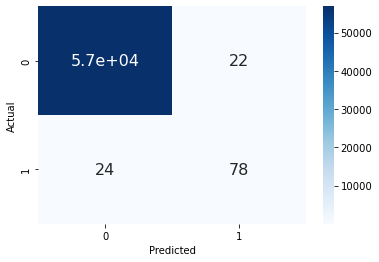

In [64]:
import seaborn as sns
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

Overall accuracy is strong, but the confusion metrics tell a different story. Despite the high accuracy level, 24 out of 102 instances of fraud are missed and incorrectly predicted as nonfraud. The false negative rate is substantial. *The intention of a fraud detection model is to minimize these false negatives*. To do so, the first step would be to choose the **right evaluation metric**. For this type of problem, we should focus on **recall**, the ratio of true positives to the sum of true positives and false negatives. So if false negatives are high, then the value of recall will be low.

In [65]:
# Select the right evaluation metric
scoring = 'recall'

In [66]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.664293 (0.089570)
LDA: 0.755895 (0.067193)
KNN: nan (nan)
CART: 0.768174 (0.091729)


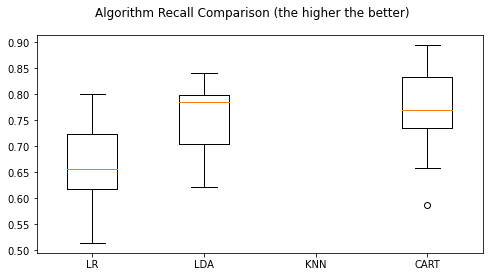

In [67]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Recall Comparison (the higher the better)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
plt.show()

Given the LDA has the best recall out of all the models, it is used to ealuate the test set.

0.999403110845827
[[56849    11]
 [   23    79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.88      0.77      0.82       102

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



<Axes: xlabel='Predicted', ylabel='Actual'>

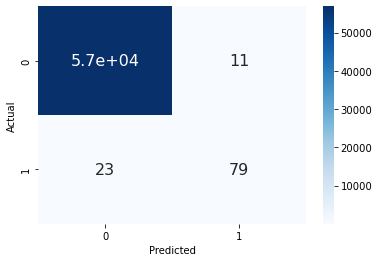

In [68]:
# prepare model
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)

# estimate accuracy on validation set
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

LDA performs slightly better, missing only 23 out of 102 cases of fraud. However, there is still improvement to be made.

### Model Tuning (with sample balancing)
Data exhibits a significant class imbalance, where there are very few data points labeled “fraud.” The issue of such class imbalance can result in a serious bias toward the majority class, reducing the classification performance and increasing the number of false negatives.

One of the **remedies** to handle such situations is to **under-sample** the data. A simple technique is to under-sample the majority class randomly and uniformly. This might lead to a loss of information, but it may yield strong results by modeling the minority class well. Random under-sampling, which consists of removing data to have a more balanced dataset. This will help ensure that our models avoid overfitting. The steps to implement random under-sampling are:
- Determine the severity of the class imbalance by using value_counts() on the class column. 
- We bring the nonfraud transaction observation count to the same amount as fraud transactions.
- We now have a subsample of our dataframe with a 50/50 ratio with regards to our classes. We train the models on this subsample. 

In [81]:
# Under-sampling process
df = pd.concat([X_train, Y_train], axis=1)
# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:fraud_df.shape[0]]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
df_new = normal_distributed_df.sample(frac=1, random_state=42)
# split out validation dataset for the end
Y_train_new= df_new["Class"]
X_train_new = df_new.loc[:, dataset.columns != 'Class']

Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


([<matplotlib.axis.XTick at 0x163ddb3d0>,
 [Text(0.15, 0, 'Not Fraud'), Text(0.85, 0, 'Fraud')])

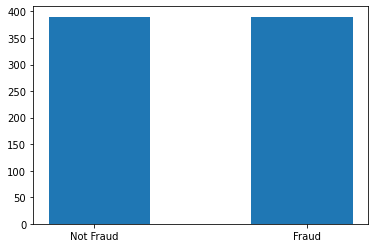

In [82]:
print('Distribution of the Classes in the subsample dataset')
print(df_new['Class'].value_counts()/len(df_new))
df_new['Class'].hist(grid=False, bins=3)
plt.xticks(ticks=[0.15,0.85], labels=['Not Fraud', 'Fraud'])

In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#Neural Network
models.append(('NN', MLPClassifier()))
# #Ensable Models 
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

In [89]:
#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
# pip install scikeras
from scikeras.wrappers import KerasClassifier
from keras.optimizers import SGD

#Writing the Deep Learning Classifier in case the Deep Learning Flag is Set to True
#Set the following Flag to 1 if the Deep LEarning Models Flag has to be enabled
EnableDLModelsFlag = 1
if EnableDLModelsFlag == 1 :   
    # Function to create model, required for KerasClassifier
    def create_model(neurons=12, activation='relu', learn_rate = 0.01, momentum=0):
        # create model
        model = Sequential()
        model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation=activation))
        model.add(Dense(32, activation=activation))
        model.add(Dense(1, activation='sigmoid'))
        # Compile model
        optimizer = SGD(lr=learn_rate, momentum=momentum)
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model    
    models.append(('DNN', KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)))

Now that the data is balanced, we will focus on accuracy as our main evaluation metric, since it considers both false positives and false nega‐ tives.

In [91]:
scoring='accuracy'
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train_new, Y_train_new, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.928205 (0.011750)
LDA: 0.917949 (0.026399)
KNN: nan (nan)
CART: 0.910256 (0.025641)
NB: 0.864103 (0.024460)
SVM: 0.532051 (0.054769)
NN: 0.603846 (0.087977)
AB: 0.930769 (0.024460)
GBM: 0.941026 (0.013074)
RF: 0.946154 (0.020513)
ET: 0.942308 (0.020067)


DNN: 0.653846 (0.149841)


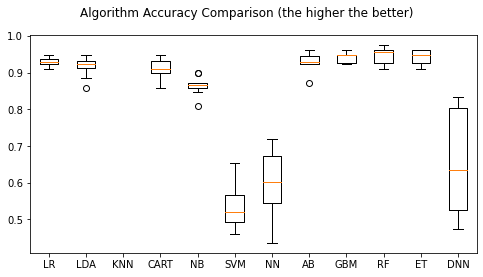

In [93]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Accuracy Comparison (the higher the better)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
plt.show()

Although a couple of models, including random forest (RF) and logistic regression (LR), perform well, GBM slightly edges out the other models. We select this for fur‐ ther analysis. A grid search is performed for the GBM model by varying the number of estimators and maximum depth.

In [95]:
from sklearn.model_selection import GridSearchCV
# Grid Search: GradientBoosting Tuning
'''
n_estimators : int (default=100)
    The number of boosting stages to perform. 
    Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
max_depth : integer, optional (default=3)
    maximum depth of the individual regression estimators. 
    The maximum depth limits the number of nodes in the tree. 
    Tune this parameter for best performance; the best value depends on the interaction of the input variables.

''' 
n_estimators = [20,180,1000]
max_depth= [2, 3,5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_new, Y_train_new)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.944872 using {'max_depth': 2, 'n_estimators': 1000}
#6 0.941026 (0.024460) with: {'max_depth': 2, 'n_estimators': 20}
#2 0.943590 (0.018311) with: {'max_depth': 2, 'n_estimators': 180}
#1 0.944872 (0.025673) with: {'max_depth': 2, 'n_estimators': 1000}
#5 0.942308 (0.022390) with: {'max_depth': 3, 'n_estimators': 20}
#2 0.943590 (0.017391) with: {'max_depth': 3, 'n_estimators': 180}
#6 0.941026 (0.019188) with: {'max_depth': 3, 'n_estimators': 1000}
#9 0.939744 (0.024359) with: {'max_depth': 5, 'n_estimators': 20}
#2 0.943590 (0.018311) with: {'max_depth': 5, 'n_estimators': 180}
#6 0.941026 (0.020831) with: {'max_depth': 5, 'n_estimators': 1000}


In [99]:
# prepare model
model = GradientBoostingClassifier(max_depth=2, n_estimators = 1000)
model.fit(X_train_new, Y_train_new)

GradientBoostingClassifier(max_depth=2, n_estimators=1000)

In [100]:
# estimate accuracy on Original validation set
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9531617569607809
[[54198  2662]
 [    6    96]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56860
           1       0.03      0.94      0.07       102

    accuracy                           0.95     56962
   macro avg       0.52      0.95      0.52     56962
weighted avg       1.00      0.95      0.97     56962



<Axes: xlabel='Predicted', ylabel='Actual'>

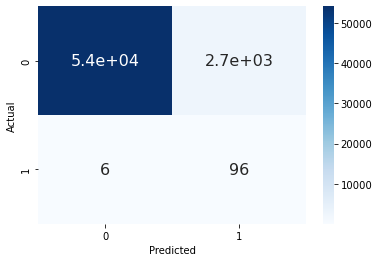

In [101]:
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

We can see that te performance on the false negative improved. However, we see that an outcome of using our under-sampled data is a propensity for false positives—cases in which nonfraud transactions are misclassi‐ fied as fraudulent. This is a trade-off the financial institution would have to consider. There is an inherent cost balance between the operational overhead, and possible customer experience impact, from processing false positives and the financial loss resulting from missing fraud cases through false negatives.